# 根據 Maze 的觀察來移動
---

In [1]:
from env.maze_env import Maze
from RLAgent import DeepQNetwork

In [2]:
# 新的視窗的 Maze
env = Maze()
Agent = DeepQNetwork(
    env.n_actions,
    env.n_features,
    replace_target_iter=200,
    memory_size=2000,
    #IsOutputGraph=True
)

## 跑 300 個週期，看學習的結果
---
其中 State(Observation) 是指到終點的座標

In [3]:
def UpdateFunction():
    step = 0
    for episode in range(300):
        observation = env.reset()
        while True:
            # 一直更新
            env.render()
            
            # 選擇 Action
            action = Agent.choose_action(observation)
            
            # 選擇某個動作後的一些回饋
            nextObservation, reward, IsDone = env.step(action)
            
            # 選擇要下去做
            Agent.store_transition(observation,action,reward,nextObservation)
            
            if (step > 200) and (step % 5 == 0):
                Agent.learn()
            
            # 更新狀態
            observation = nextObservation
            
            if IsDone:
                break
                
            step += 1
    print("Game Over")
    env.destroy()

## 開始執行
---


Target Params Change


Target Params Change


Target Params Change


Target Params Change

Game Over


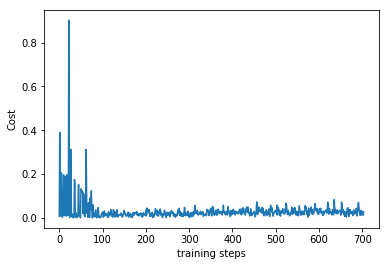

In [4]:
env.after(100, UpdateFunction)
env.mainloop()
Agent.plot_cost()